##Song Feature Analysis over time


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')
print(df.shape)

Null_values = df.isnull().sum()
# print(Null_values) #Seems like there are no null values  

print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape) #No Duplicates because no change in shape 


(170653, 19)
(170653, 19)
(170653, 19)


In [ ]:
#Overall the df looks like it is in great shape. It has no missing values or duplicated data. Since we are using spotify's song features, they are already normalized to 0 and 1 

#Re-ordering name to be the first column 
cols = df.columns.to_list()
cols = cols[cols.index('name'):] + cols[:cols.index('name')]
df = df[cols]
df.drop(["id"], axis = 1)

,name,popularity,release_date,speechiness,tempo,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1
1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1
2,Gati Bali,5,1921,0.0339,110.339,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1
3,Danny Boy,3,1921,0.0354,100.109,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1
4,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,China,72,2020-05-29,0.0881,105.029,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1
170649,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1
170650,AYA,76,2020-11-03,0.0809,91.688,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0
170651,Darkness,70,2020-01-17,0.3080,75.055,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1


In [ ]:
#Lets figure out how trends of songs have changed over the years. First, we make a new data frame that groups by years
df2 = df.groupby('year').mean().reset_index()


In [ ]:
df2

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,1920,0.379327,0.886896,0.418597,260537.166667,0.231815,0.046667,0.344878,5.093333,0.205710,-17.048667,0.673333,0.653333,0.073662,101.531493
1,1920,0.535549,0.938592,0.482042,165469.746479,0.237815,0.000000,0.434195,5.267606,0.240720,-19.275282,0.633803,0.140845,0.116655,100.884521
2,1920,0.625492,0.957247,0.577341,177942.362162,0.262406,0.000000,0.371733,4.810811,0.227462,-14.129211,0.789189,5.389189,0.093949,114.010730
3,1920,0.663725,0.940200,0.549894,191046.707627,0.344347,0.000000,0.581701,5.648305,0.235219,-14.231343,0.754237,0.661017,0.092089,120.689572
4,1920,0.621929,0.962607,0.573863,184986.924460,0.278594,0.000000,0.418297,5.107914,0.237668,-14.146414,0.730216,2.604317,0.111918,115.521921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1920,0.431532,0.284171,0.600202,221396.510295,0.592855,0.309961,0.093984,5.139121,0.181170,-8.061056,0.646077,59.647190,0.104313,118.652630
96,1920,0.416476,0.286099,0.612217,211115.696787,0.590421,0.338353,0.097091,5.122490,0.191713,-8.312630,0.623996,63.263554,0.110536,117.202740
97,1920,0.447921,0.267633,0.663500,206001.007133,0.602435,0.427960,0.054217,5.353780,0.176326,-7.168785,0.611983,63.296243,0.127176,121.922308
98,1920,0.458818,0.278299,0.644814,201024.788096,0.593224,0.398666,0.077640,5.142637,0.172616,-7.722192,0.619805,65.256542,0.121043,120.235644


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


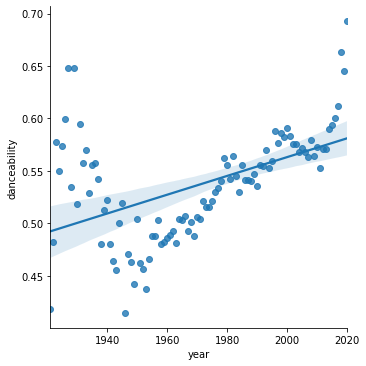

In [ ]:
sns.lmplot('year', 'danceability', data=df2, fit_reg=True)

In [ ]:
def quantize(x):
  x = int(x/10)
  x = x%100
  if int(x/10) == 9:
    return 1000+10*x
  if int(x/10) ==0:
    return 2000+10*x
  

list_year = list(df2["year"].unique()) 

df3 = df
df3['year'] = df3["year"].apply(quantize)

df_decades = df3.groupby('year').mean().reset_index()


# df2[df2.year == 1992]

In [ ]:
df_decades

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,1920,0.542143,0.801554,0.586963,183769.229419,0.235133,0.133632,0.377181,5.405579,0.210910,-16.699090,0.694108,1.304331,0.291475,110.431253
1,1930,0.567896,0.867694,0.541664,207616.599539,0.286655,0.061891,0.276707,5.310713,0.225639,-14.214586,0.693266,2.536601,0.204065,111.545690
2,1940,0.487830,0.870974,0.473476,217894.653661,0.254896,0.071076,0.363176,5.178697,0.221343,-15.331419,0.702042,1.876252,0.153847,107.379639
3,1950,0.478597,0.840334,0.476858,220482.874358,0.286753,0.007758,0.247795,5.030227,0.209219,-14.731226,0.710882,10.692091,0.093679,110.972049
4,1960,0.551939,0.624013,0.494697,211668.431071,0.414520,0.000563,0.157578,5.107269,0.208687,-12.676736,0.753952,26.551742,0.057731,115.166468
5,1970,0.585098,0.400162,0.524927,254051.705500,0.533716,0.003550,0.116031,5.088750,0.216406,-11.424966,0.743200,35.055800,0.059764,119.858574
6,1980,0.564420,0.298634,0.546385,252120.366045,0.594715,0.023224,0.122269,5.270932,0.204639,-11.226990,0.709874,37.523426,0.062035,121.345255
7,1990,0.544997,0.307533,0.566082,248595.562535,0.586066,0.115120,0.109744,5.330235,0.196547,-10.004415,0.723079,44.192252,0.080528,119.404234
8,2000,0.530295,0.269761,0.574142,239517.406953,0.651586,0.141301,0.083848,5.282297,0.195582,-7.501916,0.685483,49.734348,0.087719,121.254695
9,2010,0.456371,0.264094,0.597419,227089.288561,0.629011,0.267725,0.087420,5.187317,0.189556,-7.509348,0.648276,57.642915,0.098858,120.839938


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


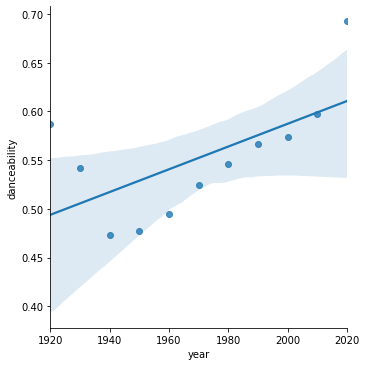

In [ ]:
sns.lmplot('year', 'danceability', data=df_decades, fit_reg=True)

There is a very clear overall upward trend in the daceability of songs since the 1920s. Daceability is a song feature offered by Spotify that is on a scale from 0 to 1 with 1 being the most daceable. This feature takes into account the songs tempo, rhythm, beat strength and overall regularity. The overall upward trends in daceability is very expected, with the rise of the disco era in the 1960s through the steady increase in the club/music festival culture throughout the 2000s and 2010s. This incrase in daceability is very strongly correlated with the incrase in tempo since 1920s. Intuively, we would want to dance to higer tempo music, espically in clubs and music festivals, further justifying the trend in daceability. However, we can expect the early 2020s to be a statisticaly outlier in this trend because of the current pandemic causing a sharp increase in the closer of nightclubs (Vox). Unfortunely this dateset only goes upto 2019, so this would be interesting to analyse in the future. We can see the 1930s and 1940s are  statistical outliers in the overall increase in daceability. A possible explanantion fo this is the great depression in the 1930s and the second world war that lasted throughout the mid 1940s. From the 1940s, we can see a stready increase. https://www.vox.com/the-highlight/21363908/coronavirus-nightclubs-music-venues

#Explict Vs Time

In [ ]:
df = pd.read_csv('data.csv')
df_years = df.groupby('year').mean().reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


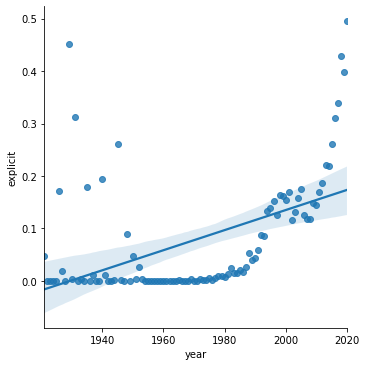

In [ ]:
sns.lmplot('year', 'explicit' , data=df_years, fit_reg=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


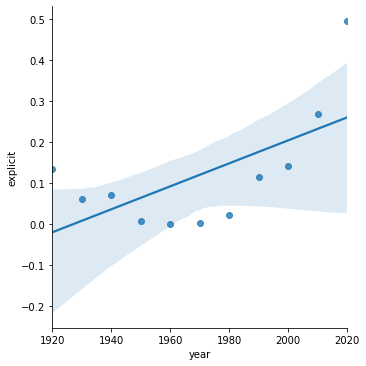

In [ ]:
sns.lmplot('year', 'explicit' , data=df_decades, fit_reg=True)

There is an overall increase in explictness of music since the 1920s. This can be attributed largely to the rise of hip/hop as concluded by another study done by a data analyst Mark Bannister, also using Spotify's API (Newsweek). He reasoned the rise in explictness not only to hip/hop for making it trendy, but also introducing a numbness factor where over time, we become less recepitive to an explictness level. This means we can justify the increase in explicitness over the years as an attempt by music artists to continue to keep us engaged with their music. https://www.newsweek.com/songs-explicit-lyrics-popular-increase-billboard-spotify-583551

#Instrumentalness vs Time

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


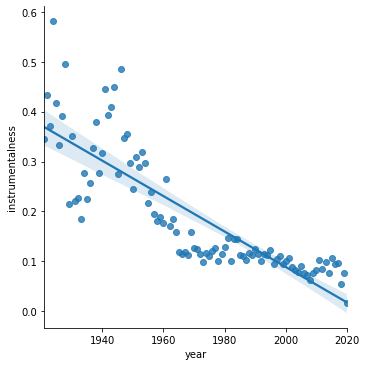

In [ ]:
sns.lmplot('year', 'instrumentalness' , data=df_years, fit_reg=True)

Instrumentallness is another feature offered by the Spotify API. The rate each song on a scale from one to zero, with one being a track that contains no vocals and an acapella would earn a score of close to zero. The steady decline intrumentalness can be explained by the shift in popular genres over the decades. Earlier in the century, genres like classical were more popular that did not have a lot of vocals. In the mid 20th century, there was more of a shift to disco and jazz that involved more words but still had a prime focus on the intrumnetnalness. Now, in the early 21st century, the most popular genres are pop and hip-hop/rap which are heavily focused and build off of their vocals. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


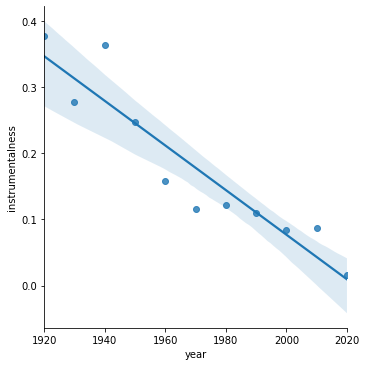

In [ ]:
sns.lmplot('year', 'instrumentalness' , data=df_decades, fit_reg=True)

#Modality

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


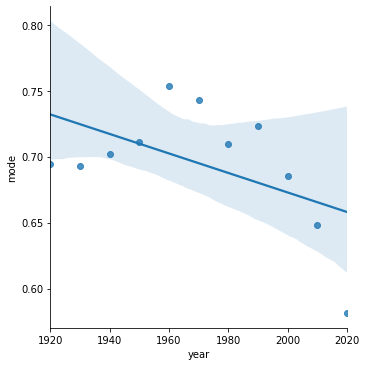

In [ ]:
sns.lmplot('year', 'mode' , data=df_decades, fit_reg=True)

Acousticness 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


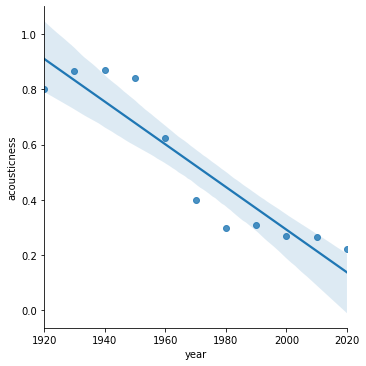

In [ ]:
sns.lmplot('year', 'acousticness' , data=df_decades, fit_reg=True)

The acoustiness of a song is a confidence measure bewtween one and zero with one being more confident. A song with a acousticness rating of 1 would mean that it is very certain that the song is soley composed with intruments that generate sounds through acoustic instruments as opposed to electric sounds. The overall decreasing trend in acousticness is very interesting and can be largely attributed to the adnavcements of technology in the music field and the shift in popular music genres. Early in the 20th century, music softwares pratically did not exist and the technology of electrical instruments were not very good. As we moved through the industrial age into the the technological age, we developed better electical instruments and developed software to make sythenic sounds. This gave birth to entire music genres like electronica while creating dominating subcultres within genres like hip-hop/rap. The advancement in technology and the overall rise in popularity of music genres that did use electic/synthetic sound, can be used to explain this explain the fast decrease in acousticness of songs since the early 20th century. 

Speechiness

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


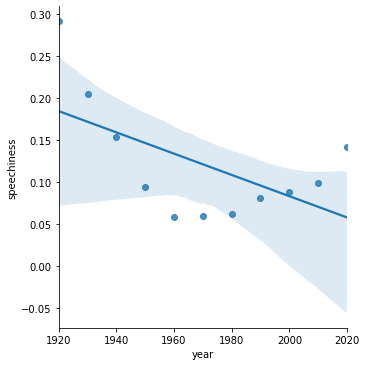

In [ ]:
sns.lmplot('year', 'speechiness' , data=df_decades, fit_reg=True)

#Tempo

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


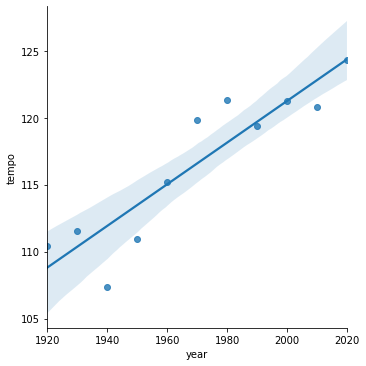

In [ ]:
sns.lmplot('year', 'tempo' , data=df_decades, fit_reg=True)